 This project is about business.
 the idea in this project is to predict the probability of a click being fraud or not in the chiness company by looking 
 features like ip address operating system, device type, time of click...

In [1]:
# let's import all backages that we will need in this project
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
%matplotlib inline

In [2]:
data=pd.read_csv("C:\\Users\\marce\\OneDrive\\Ambiente de Trabalho\\DataScience\\Tree\\talking_data.csv")

## Explore the dataset for anomalies and missing values and take corrective actions if necessary.**

In [3]:
# print the shape
print(data.shape) # as we can see we have 100000 row and 8 columns 

(100000, 8)


In [4]:
# print the name of the columns
print (data.columns)

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed'],
      dtype='object')


In [5]:
# print the data.info to see the dtype of my data and also print the print the describe function to see information about statict

In [6]:
data.info() # as we can see in the information, we have 6 numerical variable and 2 categorical
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [7]:
# see the first 10 element in my data to analyze it
data.head(10)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
5,93663,3,1,17,115,2017-11-09 01:22:13,NaN,0
6,17059,1,1,17,135,2017-11-09 01:17:58,NaN,0
7,121505,9,1,25,442,2017-11-07 10:01:53,NaN,0
8,192967,2,2,22,364,2017-11-08 09:35:17,NaN,0
9,143636,3,1,19,135,2017-11-08 12:35:26,NaN,0


In [8]:
# as we can see in data, we have attributed_time NaN, and is_attributed (my dependent variable 0) it's look like
# those columns may have need some ajustment.

In [9]:
# so let's looking for missing value 
data.isnull().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [10]:
# like I was expected by looking my data, we have  99773 missing value in attributed_time .
data

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0


In [11]:
# let's delete the NaN values, by creating a new variable called data1
data1=data.drop('attributed_time',axis=1)

In [12]:
# so let's looking for missing value 
data1.isnull().sum()

ip               0
app              0
device           0
os               0
channel          0
click_time       0
is_attributed    0
dtype: int64

In [13]:
data1.shape

(100000, 7)

In [14]:
data1

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0
...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,0


In [15]:
# Now we do not have the column attributed_time.
# so let's see info about my new data


In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ip             100000 non-null  int64 
 1   app            100000 non-null  int64 
 2   device         100000 non-null  int64 
 3   os             100000 non-null  int64 
 4   channel        100000 non-null  int64 
 5   click_time     100000 non-null  object
 6   is_attributed  100000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 5.3+ MB


In [17]:
# Now i will examine column 1 by 1
data1['click_time'].unique
# by examine the data, we can see everything is 
# print (data1['ip'].value_counts())
#print (data1['os'].unique())
#print (data1['ap'].unique())
print (data1['click_time'].unique())

['2017-11-07 09:30:38' '2017-11-07 13:40:27' '2017-11-07 18:05:24' ...
 '2017-11-09 04:21:28' '2017-11-07 09:33:14' '2017-11-09 13:25:41']


In [18]:
 
data1.dtypes

ip                int64
app               int64
device            int64
os                int64
channel           int64
click_time       object
is_attributed     int64
dtype: object

In [19]:
# so now, let's pick up the column click_time which is a categorical variable and transforme it in numerical variable by using 
# the loop for.
#for feature in data1.columns: # Loop through all columns in the dataframe
  #  if data1[feature].dtype == 'object': # Only apply for columns with categorical strings
   #     data[feature] = pd.Categorical(data[feature]).codes # Replace strings with an integer

#data1.info()
#data1.describe()

# vizualize data

<AxesSubplot:xlabel='ip', ylabel='device'>

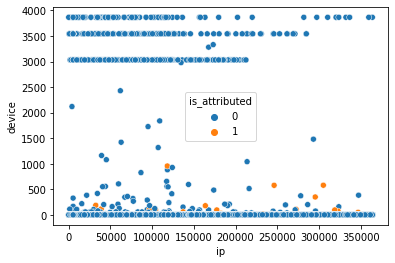

In [82]:
# so, now let's do some plot and see the relationship between variables
sns.scatterplot(x='ip',y='device',hue='is_attributed',data=data1)

<AxesSubplot:xlabel='ip', ylabel='device'>

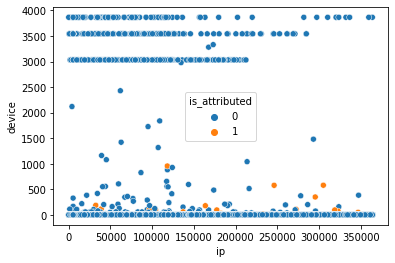

In [148]:
sns.scatterplot(x='ip',y='device',hue='is_attributed',data=data1)

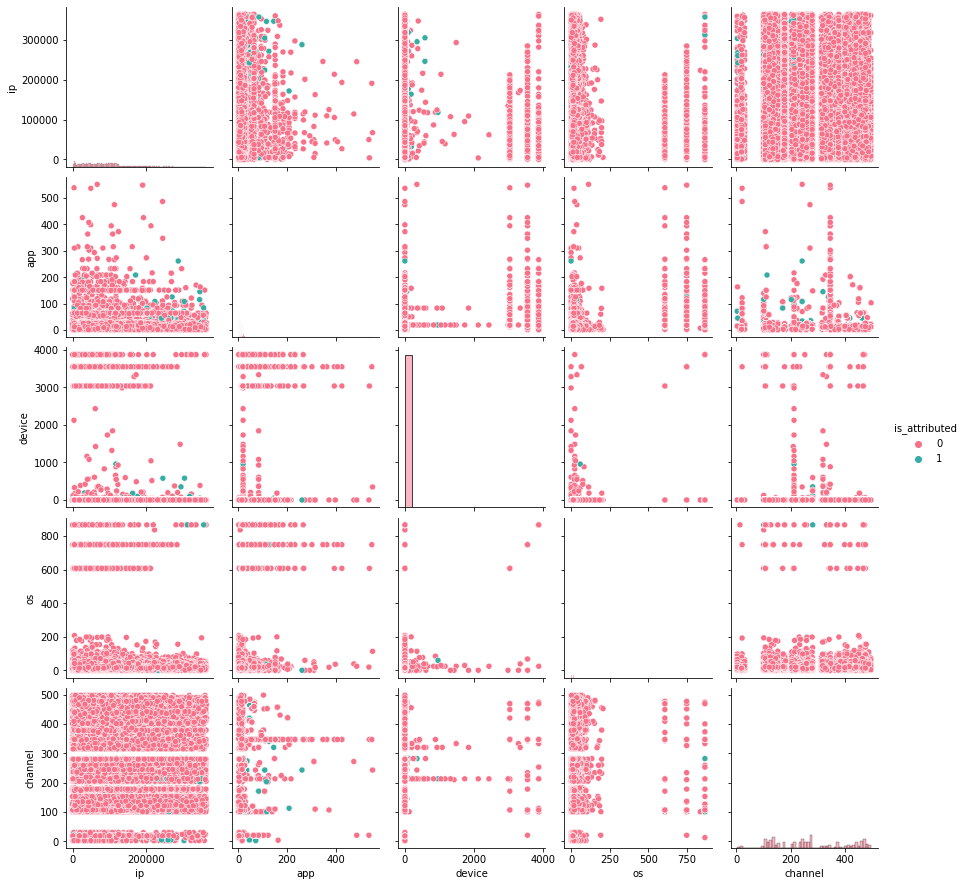

In [20]:
sns.pairplot(data1, hue="is_attributed", diag_kind = 'hist', palette="husl")

In [ ]:
# in the graph we can see that, almost 90% of our data is 0, mean that we do no fraud. and we do not have as much relationship between variable

In [21]:
# do the correlation between my variable in my data
corr = data1.corr()
corr

,ip,app,device,os,channel,is_attributed
ip,1.000000,0.010400,-0.001499,-0.000470,0.007563,0.054955
app,0.010400,1.000000,0.248376,0.247160,-0.028238,0.064426
device,-0.001499,0.248376,1.000000,0.924456,-0.035398,-0.000695
os,-0.000470,0.247160,0.924456,1.000000,-0.033175,0.006183
channel,0.007563,-0.028238,-0.035398,-0.033175,1.000000,-0.023336
is_attributed,0.054955,0.064426,-0.000695,0.006183,-0.023336,1.000000


In [ ]:
# as we can see in the correlation table, we do not have a very good correlationship between variables, the only good corelactionship 
# that we have is corelationship between DEVICE and OS. we can say that, these two varible have a strong correlationship

<AxesSubplot:>

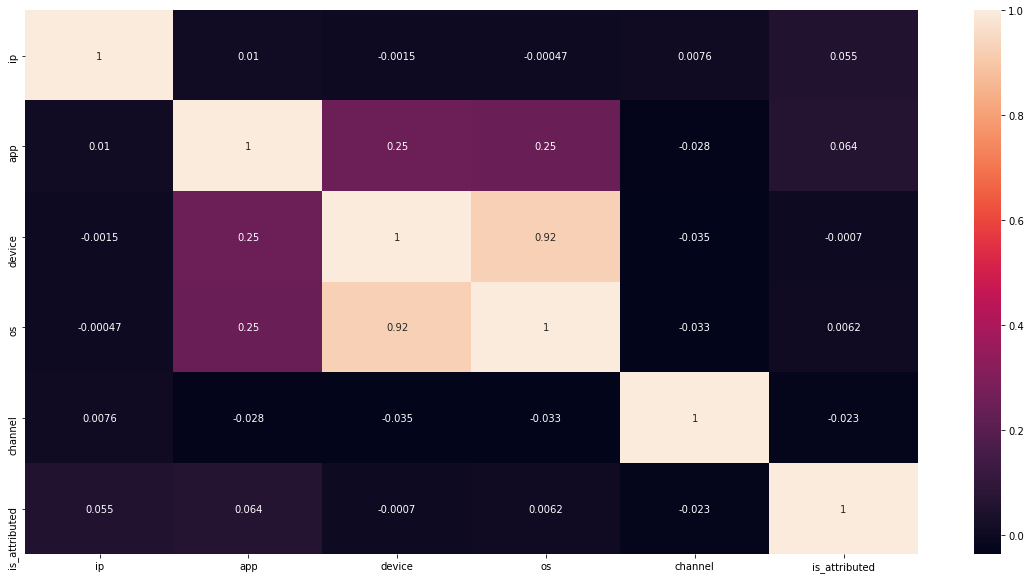

In [22]:
# do the heatmap to get more elivible result about corelation between variable
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [ ]:
# As we can see in the map, we have some corelation between variable almost zero. that's mean does variable do not have a 
# important impact in my analizes
# for example correlaction between ip and os is almost zero, but I will keep this variable in my analizes
# because it has a good corelaction with others variable

<AxesSubplot:xlabel='is_attributed', ylabel='count'>

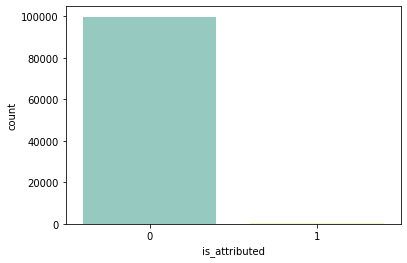

In [20]:
# now let's see if the data is balance or not by ploting the countplot
sns.countplot(x='is_attributed', data=data1, palette='Set3')

In [ ]:
# as we can see, the data is unbalanced because we have more than 90% of data as 0
# we can say that The vast majority of the transactions will be in the “Not-Fraud” class and a very
#small minority will be in the “Fraud” class.

In [ ]:
# question. how to balance my data

## **2. Which column has maximum number of unique values present among all the available columns**

In [21]:
uniques = {col: data1[col].unique() for col in data1}

In [22]:
uniques

{'ip': array([ 87540, 105560, 101424, ..., 153487,  34029, 185961], dtype=int64),
 'app': array([ 12,  25,  13,   3,   1,   9,   2,   6,  20,  14,  64,   7,  15,
         18,  11,   8,  23,  21,  56,  28,  36,  22,  26,  17,  27,  10,
         60,  58,  19,  32,  24,   4,  53, 125, 204,   5, 202,  70,  47,
         29,  55, 103,  35,  83, 208, 146, 161,  46,  62,  65, 110,  42,
        150, 266, 151, 148,  72, 310,  93,  94,  71,  43,  39, 170,  37,
         68,  54, 107, 398, 160,  30, 183, 315,  45, 121,  38,  82, 134,
         33, 233, 100,  44, 109,  59,  74,  61, 104,  66,  67, 273, 192,
         50, 118, 372,  48, 232, 165,  91, 123,  88, 538,  49,  16, 105,
        536, 216, 425, 117, 551,  99,  86, 101, 394,  78,  95, 181,  76,
         34, 124, 548, 108,  85, 145,  79,  97,  75,  52, 215,  84,  96,
         81, 139, 267,  80, 137, 119, 474, 158, 293, 122, 112, 149, 363,
        271,  31, 171,  87, 168, 176, 347, 163, 190, 486, 133, 302, 268,
        407, 116,  92, 115, 261], d

In [23]:
categorical_columns = ['ip','app','device','os','channel','click_time','is_attributed']
#Print frequency of categories
for col in categorical_columns:
    print (data1[col].value_counts())

5348      669
5314      616
73487     439
73516     399
53454     280
         ... 
125982      1
5153        1
177205      1
60478       1
92122       1
Name: ip, Length: 34857, dtype: int64
3      18279
12     13198
2      11737
9       8992
15      8595
       ...  
407        1
145        1
271        1
398        1
92         1
Name: app, Length: 161, dtype: int64
1       94338
2        4345
0         541
3032      371
3543      151
        ...  
420         1
37          1
549         1
2980        1
347         1
Name: device, Length: 100, dtype: int64
19     23870
13     21223
17      5232
18      4830
22      4039
       ...  
116        1
142        1
137        1
185        1
127        1
Name: os, Length: 130, dtype: int64
280    8114
245    4802
107    4543
477    3960
134    3224
       ... 
261       1
498       1
465       1
474       1
451       1
Name: channel, Length: 161, dtype: int64
2017-11-08 12:01:02    7
2017-11-09 14:46:23    6
2017-11-07 04:36:16    6
2017-11

In [24]:
#column_values = data1[['ip','app','device','os','channel','click_time','is_attributed']].values
#unique_values =  np.unique(['ip','app','device','os','channel','click_time','is_attributed'])

In [25]:
# the column that has maximum number of unique values present  is the click_time column

## Use an appropriate technique to get rid of all the apps that are very rare (say which comprise of less                than 20% clicks) and plot the rest..**

In [26]:
data1['app'].value_counts() 
app_count=data1['app'].value_counts()

In [27]:
# create a variable app_add to have all app that have > 20 of click.

In [28]:
#app_count[app_count<50].index
app_add=app_count[app_count>50].index
#app_count[app_count>50]
app_add

Int64Index([  3,  12,   2,   9,  15,  18,  14,   1,  13,   8,  21,  11,  26,
             23,   6,  64,   7,  20,  25,  28,  24,  27,  19,  10,  22,  17,
             29,  32,   5, 151,  36, 150,   4,  47],
           dtype='int64')

In [29]:
# create a variable call app_remove to remove all app had < 50 % of click.

In [30]:
app_remove=app_count[app_count<50].index
app_remove

Int64Index([ 35,  55,  58,  94,  37,  45,  93,  62, 183,  82,
            ...
             91, 538, 474, 536, 216, 407, 145, 271, 398,  92],
           dtype='int64', length=126)

In [31]:
# create a list inicially empty and write a loop for to add the new value (app_add) into it. 

In [32]:
clean_data=[]
for app in app_add:
    clean_data.append (data1.loc[data1['app']==app])
    

In [33]:
clean_data

[           ip  app  device  os  channel           click_time  is_attributed
 5       93663    3       1  17      115  2017-11-09 01:22:13              0
 9      143636    3       1  19      135  2017-11-08 12:35:26              0
 10      73839    3       1  22      489  2017-11-08 08:14:37              0
 11      34812    3       1  13      489  2017-11-07 05:03:14              0
 12     114809    3       1  22      205  2017-11-09 10:24:23              0
 ...       ...  ...     ...  ..      ...                  ...            ...
 99983   51379    3       1  41      135  2017-11-07 01:48:00              0
 99985   61500    3       1  10      280  2017-11-09 01:50:53              0
 99989   92730    3       1  19      379  2017-11-07 11:02:08              0
 99993  146258    3       1  13      280  2017-11-09 03:03:17              0
 99997   18839    3       1  13       19  2017-11-08 11:38:42              0
 
 [18279 rows x 7 columns],
            ip  app  device  os  channel       

In [34]:
#  create a final_data to have my clean_data. (data which has >50% of click app)

In [35]:
final_data=pd.concat(clean_data,axis=0)

In [36]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99088 entries, 5 to 97511
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ip             99088 non-null  int64 
 1   app            99088 non-null  int64 
 2   device         99088 non-null  int64 
 3   os             99088 non-null  int64 
 4   channel        99088 non-null  int64 
 5   click_time     99088 non-null  object
 6   is_attributed  99088 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 6.0+ MB


In [37]:
# as we can see, now we have less number( less 912 row.)

In [38]:
## data1[data1.app > 2] # ask question?

In [39]:
##data1['app'].unique

In [40]:
## 100000-85128 now you can see data, my data is less 14872 time.
# but I want to see the value of app was been removed, how i can see it?

## **4. By using Pandas derive new features such as - 'day_of_week' , 'day_of_year' , 'month' , and 'hour' as  float/int datatypes using the 'click_time' column . Add the newly derived columns in original dataset.**

In [41]:
data['click_time'] # see what we have in the column click_time. and as we can see the dtpy is a object.

0        2017-11-07 09:30:38
1        2017-11-07 13:40:27
2        2017-11-07 18:05:24
3        2017-11-07 04:58:08
4        2017-11-09 09:00:09
                ...         
99995    2017-11-09 13:25:41
99996    2017-11-07 11:25:43
99997    2017-11-08 11:38:42
99998    2017-11-08 17:55:21
99999    2017-11-07 14:32:27
Name: click_time, Length: 100000, dtype: object

In [42]:
pd.to_datetime(final_data['click_time']) # using the datetime from pandas labrary, convert the object type into datetime 

5       2017-11-09 01:22:13
9       2017-11-08 12:35:26
10      2017-11-08 08:14:37
11      2017-11-07 05:03:14
12      2017-11-09 10:24:23
                ...        
95561   2017-11-09 15:00:20
95719   2017-11-09 12:59:27
96153   2017-11-09 12:40:40
96297   2017-11-09 11:05:15
97511   2017-11-09 12:32:02
Name: click_time, Length: 99088, dtype: datetime64[ns]

In [43]:
# create a variable call convert_final_data as datetime and add it into my final_data

In [44]:
final_data['convert_final_data'] = pd.to_datetime(final_data['click_time'])

In [45]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99088 entries, 5 to 97511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ip                  99088 non-null  int64         
 1   app                 99088 non-null  int64         
 2   device              99088 non-null  int64         
 3   os                  99088 non-null  int64         
 4   channel             99088 non-null  int64         
 5   click_time          99088 non-null  object        
 6   is_attributed       99088 non-null  int64         
 7   convert_final_data  99088 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 6.8+ MB


In [46]:
# now we have the final_data_year let's use the lambda and apply function from pandas labrary to extrate the day, month and
# year in the numeical dtype.

In [47]:
final_data['final_data_month'] = final_data['convert_final_data'].apply(lambda x: x.month)
final_data['final_data_day'] = final_data['convert_final_data'].apply(lambda x: x.day)
final_data['final_data_year'] = final_data['convert_final_data'].apply(lambda x: x.year)

In [48]:
final_data

,ip,app,device,os,channel,click_time,is_attributed,convert_final_data,final_data_month,final_data_day,final_data_year
5,93663,3,1,17,115,2017-11-09 01:22:13,0,2017-11-09 01:22:13,11,9,2017
9,143636,3,1,19,135,2017-11-08 12:35:26,0,2017-11-08 12:35:26,11,8,2017
10,73839,3,1,22,489,2017-11-08 08:14:37,0,2017-11-08 08:14:37,11,8,2017
11,34812,3,1,13,489,2017-11-07 05:03:14,0,2017-11-07 05:03:14,11,7,2017
12,114809,3,1,22,205,2017-11-09 10:24:23,0,2017-11-09 10:24:23,11,9,2017
...,...,...,...,...,...,...,...,...,...,...,...
95561,44744,47,2,2,484,2017-11-09 15:00:20,0,2017-11-09 15:00:20,11,9,2017
95719,73144,47,1,1,484,2017-11-09 12:59:27,0,2017-11-09 12:59:27,11,9,2017
96153,60235,47,1,17,484,2017-11-09 12:40:40,0,2017-11-09 12:40:40,11,9,2017
96297,341305,47,1,19,484,2017-11-09 11:05:15,0,2017-11-09 11:05:15,11,9,2017


In [49]:
# remove month 
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99088 entries, 5 to 97511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ip                  99088 non-null  int64         
 1   app                 99088 non-null  int64         
 2   device              99088 non-null  int64         
 3   os                  99088 non-null  int64         
 4   channel             99088 non-null  int64         
 5   click_time          99088 non-null  object        
 6   is_attributed       99088 non-null  int64         
 7   convert_final_data  99088 non-null  datetime64[ns]
 8   final_data_month    99088 non-null  int64         
 9   final_data_day      99088 non-null  int64         
 10  final_data_year     99088 non-null  int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 9.1+ MB


In [50]:
# As we can see, we have all data that we will use to do prediction the numerical type, so let's remove others columns
# that is not usifull in our analyses.


In [51]:
final_data = final_data.drop(['click_time','convert_final_data'],axis=1)

In [52]:
final_data

,ip,app,device,os,channel,is_attributed,final_data_month,final_data_day,final_data_year
5,93663,3,1,17,115,0,11,9,2017
9,143636,3,1,19,135,0,11,8,2017
10,73839,3,1,22,489,0,11,8,2017
11,34812,3,1,13,489,0,11,7,2017
12,114809,3,1,22,205,0,11,9,2017
...,...,...,...,...,...,...,...,...,...
95561,44744,47,2,2,484,0,11,9,2017
95719,73144,47,1,1,484,0,11,9,2017
96153,60235,47,1,17,484,0,11,9,2017
96297,341305,47,1,19,484,0,11,9,2017


In [53]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99088 entries, 5 to 97511
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ip                99088 non-null  int64
 1   app               99088 non-null  int64
 2   device            99088 non-null  int64
 3   os                99088 non-null  int64
 4   channel           99088 non-null  int64
 5   is_attributed     99088 non-null  int64
 6   final_data_month  99088 non-null  int64
 7   final_data_day    99088 non-null  int64
 8   final_data_year   99088 non-null  int64
dtypes: int64(9)
memory usage: 7.6 MB


In [54]:
# As we can see, now we have 9 columns instead 7 and all variable are the same type.. integer. so this is the time to start to
# train or data for the prediction 

## 5. Divide the data into training and testing subsets into 80:20 ratio(Train_data = 80% , Testing_data = 20%) and check the average download rates('is_attributed') for train and test data, scores should be comparable.**

In [55]:
# let's create variable x and y where the y will be the dependent variable and x independent variable
x=final_data.drop(['is_attributed'], axis=1)
y=final_data['is_attributed']

In [56]:
# let's print x and y just to make sure it right
x

,ip,app,device,os,channel,final_data_month,final_data_day,final_data_year
5,93663,3,1,17,115,11,9,2017
9,143636,3,1,19,135,11,8,2017
10,73839,3,1,22,489,11,8,2017
11,34812,3,1,13,489,11,7,2017
12,114809,3,1,22,205,11,9,2017
...,...,...,...,...,...,...,...,...
95561,44744,47,2,2,484,11,9,2017
95719,73144,47,1,1,484,11,9,2017
96153,60235,47,1,17,484,11,9,2017
96297,341305,47,1,19,484,11,9,2017


In [57]:
y

5        0
9        0
10       0
11       0
12       0
        ..
95561    0
95719    0
96153    0
96297    0
97511    0
Name: is_attributed, Length: 99088, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing 


In [59]:
X_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=10)

In [60]:
# print the size of my X_train,y_train, x_test and y_test

In [61]:
print(X_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(79270, 8)
(79270,)
(19818, 8)
(19818,)


## Apply XGBoostClassifier with default parameters on training data and make first 10 prediction for Test data.          NOTE: Use y_pred = model.predict_proba(X_test) since we need probabilities to compute AUC.**

In [89]:
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [91]:
# Instantiate the classifier: dt_clf_4
clf = DecisionTreeClassifier(random_state=0)
# Fit the classifier to the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [92]:
# Instantiate the XGBClassifier: xg_cl
#xg_cl = xgb.XGBClassifier(n_estimators=10, seed=123)
xgcl = xgb.XGBClassifier(n_estimators=10 ,criterion = 'gini', class_weight=None, max_depth = None, min_samples_leaf=1)
# Fit the classifier to the training set
xgcl.fit(X_train,y_train)

##==============================

# Predict the labels of the test set: preds
pred = xgcl.predict(x_test)

xgcl_score=xgcl.score(x_test , y_test)

print("The XGBoostClassifier model accuracy is {}".format(xgcl_score))
print("The confusion matrix of XGBoostClassifier   Model is")
print(metrics.confusion_matrix(y_test,pred))


[11:45:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The XGBoostClassifier model accuracy is 0.9985366838227874
The confusion matrix of XGBoostClassifier   Model is
[[19786     3]
 [   26     3]]


In [93]:
# prediction the x data using predict_proba

y_pred = xgcl.predict_proba(x_test)



In [94]:
# 

In [95]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10, centers=3, n_features=2,random_state=0)

In [96]:
# now let predit for the first 10 element in the test data
#ASK QUESTIONS. I PREDITC FOR 10 ELE LIKE TH

In [97]:
xgcl.fit(X, y) # traing data

[11:45:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, min_samples_leaf, scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', class_weight=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              criterion='gini', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              min_samples_leaf=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
for i in range(10):
    print(X[i], y_pred[i]) # prediction for the 10 first element 
  


[1.12031365 5.75806083] [0.9774193  0.02258071]
[1.7373078  4.42546234] [0.9672956  0.03270443]
[2.36833522 0.04356792] [0.9774657  0.02253432]
[0.87305123 4.71438583] [0.9774193  0.02258071]
[-0.66246781  2.17571724] [0.9774193  0.02258071]
[0.74285061 1.46351659] [0.9774193  0.02258071]
[-4.07989383  3.57150086] [0.9774193  0.02258071]
[3.54934659 0.6925054 ] [0.9774193  0.02258071]
[2.49913075 1.23133799] [0.9774193  0.02258071]
[1.9263585  4.15243012] [0.9774193  0.02258071]


In [99]:
# Compute the accuracy for my training data



## **7. On evaluating the predictions made by the model what is the AUC/ROC score with default hyperparameters.**

In [100]:
from sklearn.model_selection import cross_val_score, KFold

In [101]:
scores = cross_val_score(xgcl, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Mean cross-validation score: nan
Accuracy: nan% (nan%)


## 8. Compute feature importance score and name the top 5 features/columns .**

In [75]:
import xgboost

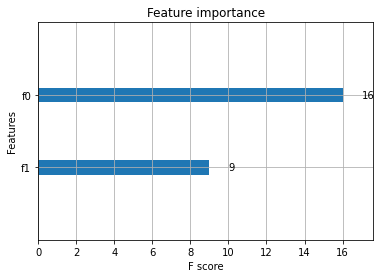

In [76]:

# Plot the top 7 features
xgboost.plot_importance(xgcl, max_num_features=5)
# Show the plot
plt.show()

In [77]:
# The XGBoost  model tells us that the ip is the most important feature of the others

## Apply BaggingClassifier with base_estimator LogisticRegression and compute AUC/ROC score.

In [78]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier

In [79]:
clf = LogisticRegression(solver="liblinear").fit(X, y)
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')


1.0

In [80]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [81]:
pipeline = make_pipeline(StandardScaler(), 
                        LogisticRegression(random_state=1))
#
# Fit the model
#
pipeline.fit(X_train, y_train)
#
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %pipeline.score(x_test, y_test), 
      'Model training Score: %.3f' %pipeline.score(X_train, y_train))

Model test Score: 0.999,  Model training Score: 0.998


In [207]:
pipeline = make_pipeline(StandardScaler(), 
                        LogisticRegression(random_state=1))
#
# Instantiate the bagging classifier
#
bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100, 
                                 max_features=10, 
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
#
# Fit the bagging classifier
#
bgclassifier.fit(X_train, y_train)
#
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test), 
      'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))

ValueError: max_features must be in (0, n_features]

## On the basis of AUC/ROC score which one will you choose from BaggingClassifier and XGBoostClassifier and              why?What does AUC/ROC score signifies?

In [ ]:
# if I look at the result for my AUC/ROC in BaggingClassifier and XGBossClassifier the result that I got is 1, which I can not
# make a good conclussion about with one I should considerer better because my data was unbalanced and for this reason my score 
# will be aproximatly one.

## What is the accuracy for BaggingClassifier and XGBoostClassifier?()

In [ ]:
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

## this is an extra secao do do some test

In [180]:
# calcular AUC?ROC
from sklearn.metrics import roc_curve
from matplotlib import pyplot

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.920


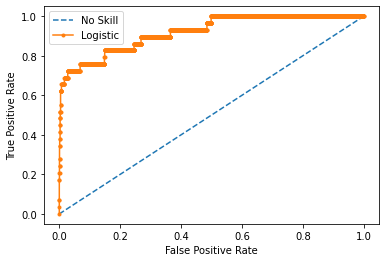

In [181]:
ns_probs = [0 for _ in range(len(y_test))]
y_pred = xgcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
y_pred = y_pred [:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [199]:
# Precision-Recall Curves in Python
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

Logistic: f1=0.250 auc=0.270


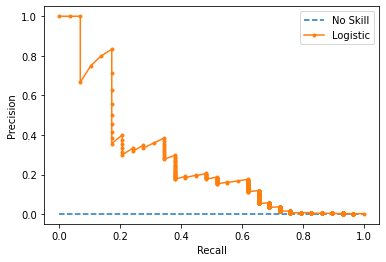

In [200]:
lr_probs = xgcl.predict_proba(x_test)
# keep probabilities for the positive outcome only

lr_probs= lr_probs[:, 1]
# predict class values
yhat = xgcl.predict(x_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()